## RealEstate

In [261]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load the data

In [262]:
data = pd.read_csv("29588378-real-estate-price-size-year.csv")
data.head()

,price,size,year
0,234314.144,643.09,2015
1,228581.528,656.22,2009
2,281626.336,487.29,2018
3,401255.608,1504.75,2015
4,458674.256,1275.46,2009


## Preprocessing

In [263]:
data.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   100 non-null    float64
 1   size    100 non-null    float64
 2   year    100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


## Dependent and Independent Variable

In [264]:
x = data.iloc[:, 1:3].values
y = data.iloc[:, 0].values

## Creating Model

In [265]:
import statsmodels.api as sm

In [266]:
new_x = sm.add_constant(x)

In [267]:
x_opt = new_x[:, [0, 1]]

In [268]:
regressor_OLS = sm.OLS(endog=y, exog=x_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     285.9
Date:                Thu, 31 Aug 2023   Prob (F-statistic):           8.13e-31
Time:                        23:11:48   Log-Likelihood:                -1198.3
No. Observations:                 100   AIC:                             2401.
Df Residuals:                      98   BIC:                             2406.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.019e+05   1.19e+04      8.550      0.000    7.83e+04    1.26e+05
x1           223.1787     13.199     16.909      0.000     196.986     249.371
==============================================================================
Omnibus:                        6.262   Durbin-Watson:                   2.267
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                2.938
Skew:                           0.117   Prob(JB):                        0.230
Kurtosis:                       2.194   Cond. No.                     2.75e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Split the data

In [269]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_opt, y)

## SVR Regressor

We need to scale the data before giving to SVR
We dont need the extra constant term

In [270]:
x_opt = x_opt[:, [1]]  ## Only using Price

In [271]:
from sklearn.preprocessing import StandardScaler

In [272]:
scaler_x = StandardScaler()  ## Creating scaler from both x and y
scaler_y = StandardScaler()

In [273]:
std_x = scaler_x.fit_transform(x_train)
std_y = scaler_y.fit_transform(y_train.reshape(-1, 1))

In [274]:
from sklearn.svm import SVR

svr_regressor = SVR(kernel="linear")

In [275]:
svr_regressor.fit(std_x, std_y[:, 0])

SVR(kernel='linear')

In [276]:
svr_regressor.score(std_x, std_y[:, 0])

0.7382162745635003

The Accuracy is almost the same

## Prediction

In [277]:
y_pred = svr_regressor.predict(scaler_x.transform(x_test))
y_pred = scaler_y.inverse_transform(y_pred.reshape(-1, 1))
pd.DataFrame({"Size": x_test[:, 1], "Predicted Value": y_pred[:, 0], "Actual Value": y_test})

,Size,Predicted Value,Actual Value
0,570.89,227956.316071,271793.312
1,685.48,252818.319279,228313.024
2,685.48,252818.319279,294582.944
3,681.07,251861.504250,297760.440
4,648.29,244749.396168,225145.248
5,705.29,257116.393138,274922.856
6,685.48,252818.319279,286161.600
7,1379.72,403444.003081,440201.616
8,694.52,254779.681606,298170.880
9,597.90,233816.536917,207742.248


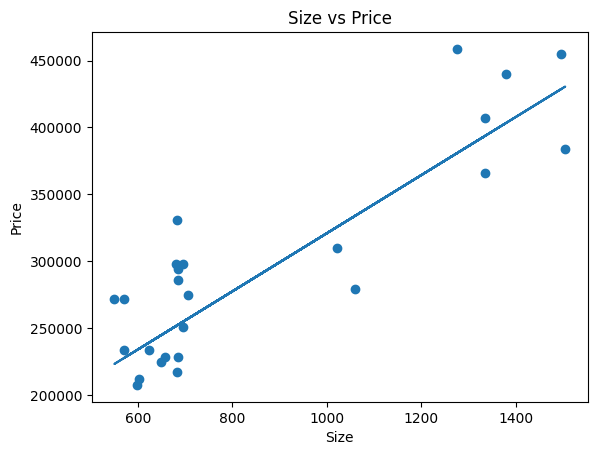

In [278]:
plt.scatter(x=x_test[:, 1], y=y_test)
plt.plot(x_test[:, 1], y_pred)
plt.title("Size vs Price")
plt.xlabel("Size")
plt.ylabel("Price")
plt.show()

In [279]:
svr_regressor.score(scaler_x.transform(x_test), scaler_y.transform(y_test.reshape(-1, 1)))

0.7532087721570822

We conclude the model is 75% accurate.
So maybe there are some factors that affect the house price such as "LOCATION" , "ARCHITECTURE" , etc..